In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import plotly.graph_objects as go
import plotly.express as px
import xarray as xr
import netCDF4 as nc
from netCDF4 import Dataset as NetCDFFile

In [55]:
ds = xr.open_dataset("D:/Documentos/Academicas/code to communicate/Curso/GeoHackeo/data golfo Mexico/cmems_mod_glo_bgc_my_0.25_P1M-m_1655149224337_cortado.nc")
ds


<xarray.Dataset>
Dimensions:    (time: 192, latitude: 13, longitude: 25, depth: 1)
Coordinates:
  * latitude   (latitude) float32 28.0 28.25 28.5 28.75 ... 30.5 30.75 31.0
  * depth      (depth) float32 0.5058
  * time       (time) datetime64[ns] 2005-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 -94.0 -93.75 -93.5 ... -88.5 -88.25 -88.0
Data variables:
    spco2      (time, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
    no3        (time, depth, latitude, longitude) float32 ...
    po4        (time, depth, latitude, longitude) float32 ...
    phyc       (time, depth, latitude, longitude) float32 ...
    si         (time, depth, latitude, longitude) float32 ...
    ph         (time, depth, latitude, longitude) float32 ...
    nppv       (time, depth, latitude, longitude) float32 ...
    fe         (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Monthly mean fields for product GLOBAL_REA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-monthly
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

In [6]:
ds.latitude.min

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'latitude' (latitude: 13)>
array([28.  , 28.25, 28.5 , 28.75, 29.  , 29.25, 29.5 , 29.75, 30.  , 30.25,
       30.5 , 30.75, 31.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 28.0 28.25 28.5 28.75 ... 30.25 30.5 30.75 31.0
Attributes:
    valid_min:            28.0
    valid_max:            31.0
    step:                 0.25
    units:                degrees_north
    unit_long:            Degrees North
    long_name:            Latitude
    standard_name:        latitude
    axis:                 Y
    _ChunkSizes:          681
    _CoordinateAxisType:  Lat>

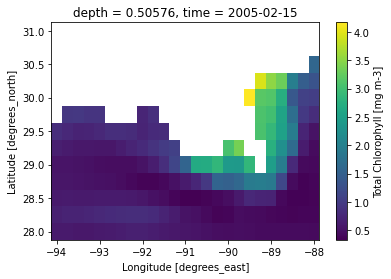

In [62]:
ds.chl.isel(time=1).plot() #niveles de clorofila, distribucion espacial de las concentraciones


C:\Users\GMoran\miniconda3\envs\nutrientes_coco\lib\site-packages\xarray\core\indexes.py:224: FutureWarning:

Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

C:\Users\GMoran\miniconda3\envs\nutrientes_coco\lib\site-packages\xarray\core\indexes.py:224: FutureWarning:

Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.



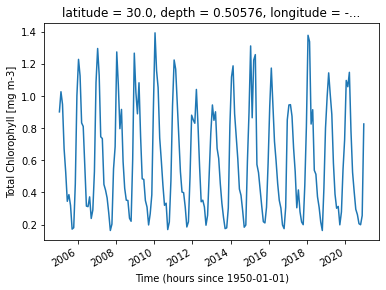

In [74]:
chl=ds.chl.sel(latitude=30, longitude=89, method='nearest')


chl.sel().plot() #cambio en el tiempo de las concnetraciones de clorofila en un punto especifico

In [ ]:
chl=ds.chl.sel(time=slice('2005-01-01','2020-12-31'))

In [58]:
ds_pd=ds.to_dataframe()
ds_pd

spco2          o2  \
time                latitude longitude depth                            
2005-01-16 12:00:00 28.0     -94.00    0.50576  30.438835  218.372131   
                             -93.75    0.50576  30.438154  218.315552   
                             -93.50    0.50576  30.427561  218.390457   
                             -93.25    0.50576  30.439611  218.423874   
                             -93.00    0.50576  30.482248  218.405502   
...                                                   ...         ...   
2020-12-16 12:00:00 31.0     -89.00    0.50576        NaN         NaN   
                             -88.75    0.50576        NaN         NaN   
                             -88.50    0.50576        NaN         NaN   
                             -88.25    0.50576        NaN         NaN   
                             -88.00    0.50576        NaN         NaN   

                                                     chl       no3       po4  \
time                latitude longitude depth                                   
2005-01-16 12:00:00 28.0     -94.00    0.50576  0.637364  0.310671  0.013918   
                             -93.75    0.50576  0.561159  0.274658  0.010410   
                             -93.50    0.50576  0.529967  0.245205  0.007518   
                             -93.25    0.50576  0.531111  0.246435  0.007535   
                             -93.00    0.50576  0.553932  0.260694  0.008509   
...                                                  ...       ...       ...   
2020-12-16 12:00:00 31.0     -89.00    0.50576       NaN       NaN       NaN   
                             -88.75    0.50576       NaN       NaN       NaN   
                             -88.50    0.50576       NaN       NaN       NaN   
                             -88.25    0.50576       NaN       NaN       NaN   
                             -88.00    0.50576       NaN       NaN       NaN   

                                                    phyc        si        ph  \
time                latitude longitude depth                                   
2005-01-16 12:00:00 28.0     -94.00    0.50576  2.024342  4.442899  8.139993   
                             -93.75    0.50576  1.860929  4.215192  8.139948   
                             -93.50    0.50576  1.812602  4.113436  8.140061   
                             -93.25    0.50576  1.821451  4.107601  8.139939   
                             -93.00    0.50576  1.881953  4.090812  8.139462   
...                                                  ...       ...       ...   
2020-12-16 12:00:00 31.0     -89.00    0.50576       NaN       NaN       NaN   
                             -88.75    0.50576       NaN       NaN       NaN   
                             -88.50    0.50576       NaN       NaN       NaN   
                             -88.25    0.50576       NaN       NaN       NaN   
                             -88.00    0.50576       NaN       NaN       NaN   

                                                     nppv        fe  
time                latitude longitude depth                         
2005-01-16 12:00:00 28.0     -94.00    0.50576  18.611565  0.001284  
                             -93.75    0.50576  16.947258  0.001125  
                             -93.50    0.50576  16.688707  0.001030  
                             -93.25    0.50576  16.987892  0.000996  
                             -93.00    0.50576  17.705801  0.000988  
...                                                   ...       ...  
2020-12-16 12:00:00 31.0     -89.00    0.50576        NaN       NaN  
                             -88.75    0.50576        NaN       NaN  
                             -88.50    0.50576        NaN       NaN  
                             -88.25    0.50576        NaN       NaN  
                             -88.00    0.50576        NaN       NaN  

[62400 rows x 10 columns]

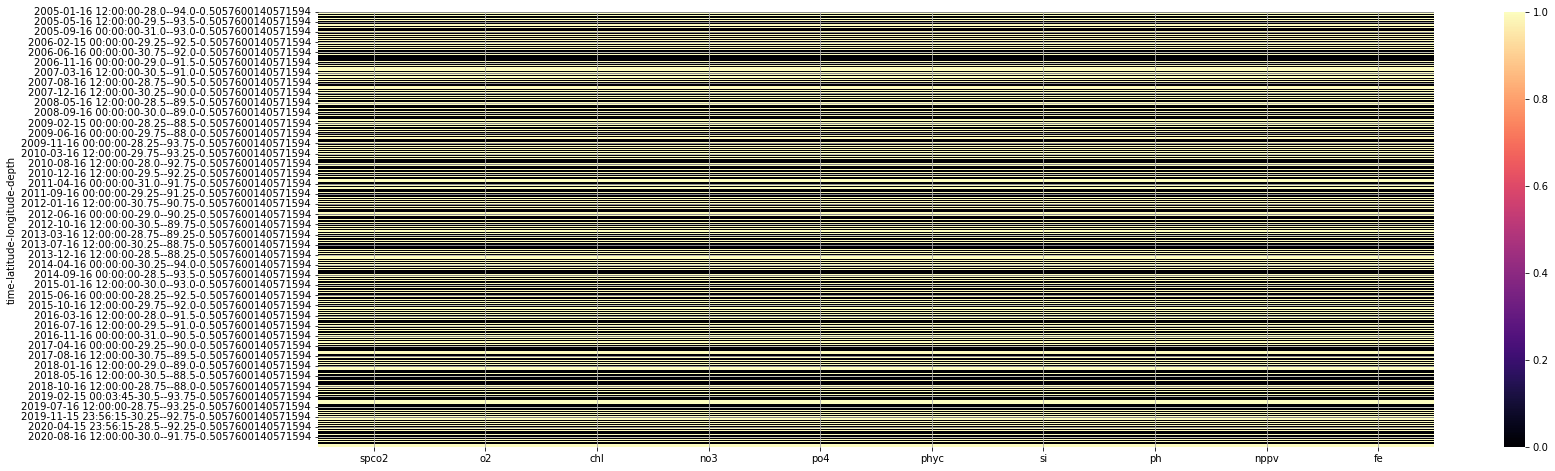

In [59]:
fig, ax = plt.subplots(figsize=(25,8))
sn.heatmap(ds_pd.isnull(), ax=ax, cmap="magma") #hacemos un heatmap para ver donde estan los valores nulos y ver que habria que eliminar
plt.grid()
plt.show()

In [61]:
px.histogram(ds_pd, x='chl', barmode='group') #histograma de clorofila